# Classical transformations
## Boolean automata<br>

In [1]:
# We disable autosave for technical reasons.
# Replace 0 by 120 in next line to restore default.
%autosave 0

Autosave disabled


In [2]:
import awalipy # If import fails, check that 
               # Python version used as Jupyter
               # kernel matches the one
               # Awalipy was compiled with.

[Warning] The python module awalipy relies on compilation executed "on-the-fly" depending on the context (type of weights, of labels, etc.). As a result, the very first call to a given function in a given context may take up to one minute. 


### 1. Determinization

(`a1` is one of the example automaton in the library.)

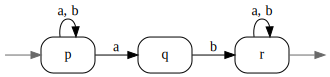

In [3]:
A1 = awalipy.load("a1")
A1.display()

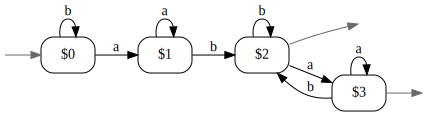

In [4]:
A2 = A1.determinize()
A2.display()

### 2. Minimization

The minization process is called with the method `min_quotient`.

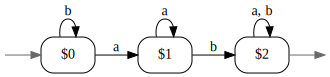

In [5]:
A3 = A2.min_quotient()
A3.display()

### 3. Epsilon removal

The epsilon-removal process is called with the method `proper()`.

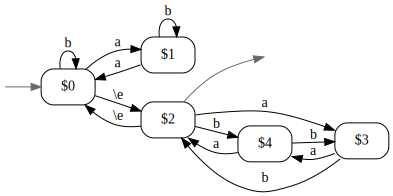

In [6]:
B = awalipy.Automaton("ab",size=5,allow_eps=True)
s = B.states()
B.set_initial(0)
B.add_transition(s[0],s[1],'a')
B.add_transition(s[1],s[0],'a')
B.add_transition(s[0],s[0],'b')
B.add_transition(s[1],s[1],'b')
B.add_transition(s[2],s[3],'a')
B.add_transition(s[3],s[4],'a')
B.add_transition(s[4],s[2],'a')
B.add_transition(s[2],s[4],'b')
B.add_transition(s[4],s[3],'b')
B.add_transition(s[3],s[2],'b')
B.add_transition(s[0],s[2],"\\e")
B.add_transition(s[2],s[0],"\\e")
B.set_final(2)
B.display()

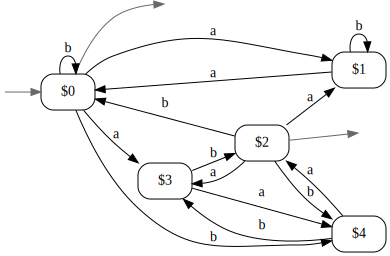

In [7]:
B2 = B.proper()
B2.display()

### 4. All in one "minimal automaton"

The method `minimal_automaton()` gives the minimal DFA equivalent to its arguments. Determinizing and removing epsilon transition if necessary.

---
Let us take back the automaton `B`.

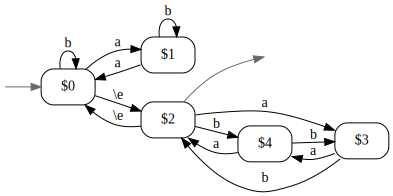

In [8]:
B.display()

...and call the method `minimal_automaton()`.

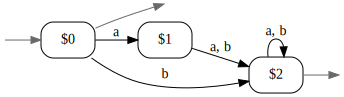

In [9]:
B.minimal_automaton().display()

### 5. Product (intersection)

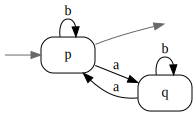

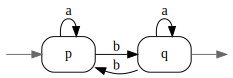

In [10]:
C1 = awalipy.load("evena")
C2 = awalipy.load("oddb")
C1.display()
C2.display()

---
`C` is the (intersection) product of `C1` with `C2`.

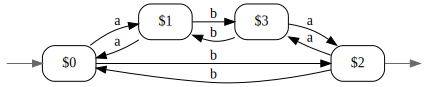

In [11]:
C = awalipy.product(C1,C2)
C.display()

---
When standard operation is used, the "history" of each state is stored and may be displayed.

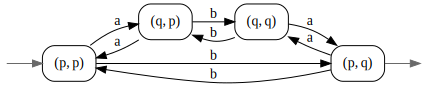

In [12]:
C.display(history=True)

### 6. Sum (union)

Recalling the operands `C1` and `C2`

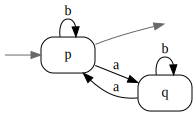

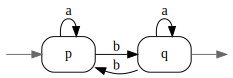

In [13]:
C1.display()
C2.display()

The function `union()` simply puts the two automata side by side. 

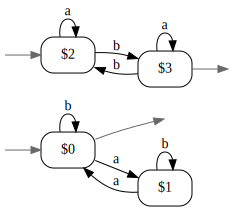

In [14]:
D = C1.sum(C2)
D.display()

---
Determinizing and minimizing `D`

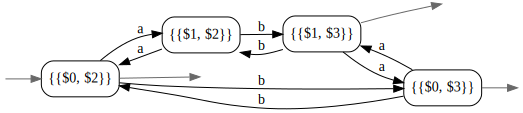

In [15]:
D.minimal_automaton().display(history=True)

### 7. Concatenation

Recalling the operands `C1` and `C2`

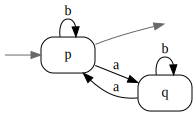

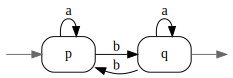

In [16]:
C1.display()
C2.display()

Concatenating by `C1` and `C2`. Result may be non-deterministic.

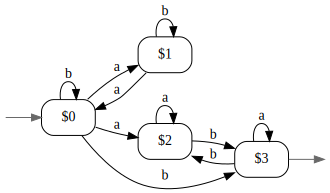

In [17]:
E = C1.concatenate(C2)
E.display()

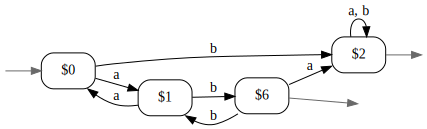

In [18]:
F = E.minimal_automaton()
F.display()

### 8. Complementation

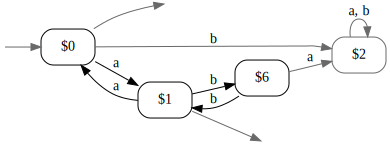

In [19]:
G = F.complement()
G.display()